### Load data

In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

main_file_path = 'https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/regression_data.csv'
test_data_path = 'https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/regression_test.csv'
Iowadata = pd.read_csv(main_file_path)
Iowadata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Get to know your Data better

In [3]:
# Get details about your data
Iowadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
col_of_interest = ['LotArea', 'SalePrice']
col_data = Iowadata[col_of_interest]
col_data.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


### Data Visualization

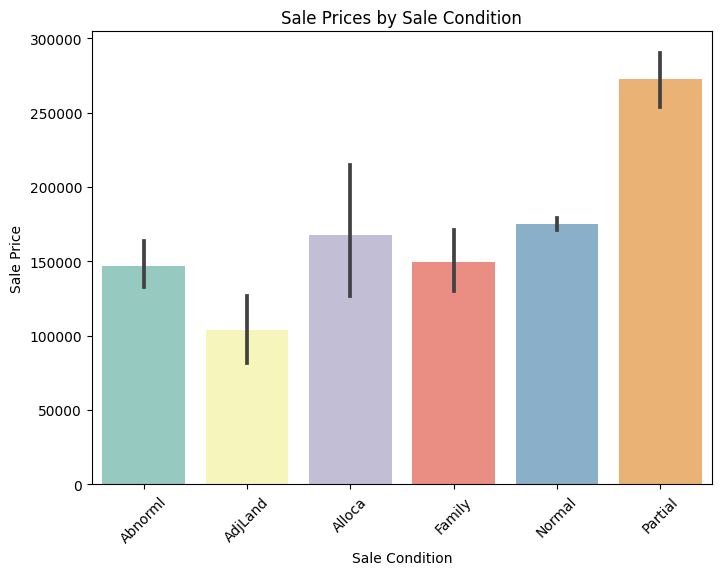

In [6]:
# Plot Sale Prices by Sale Condition
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=Iowadata['SaleCondition'].sort_values(ascending=True),y=Iowadata['SalePrice'].sort_values(ascending = True),data=Iowadata,orient='v',palette='Set3')
plt.title("Sale Prices by Sale Condition")
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

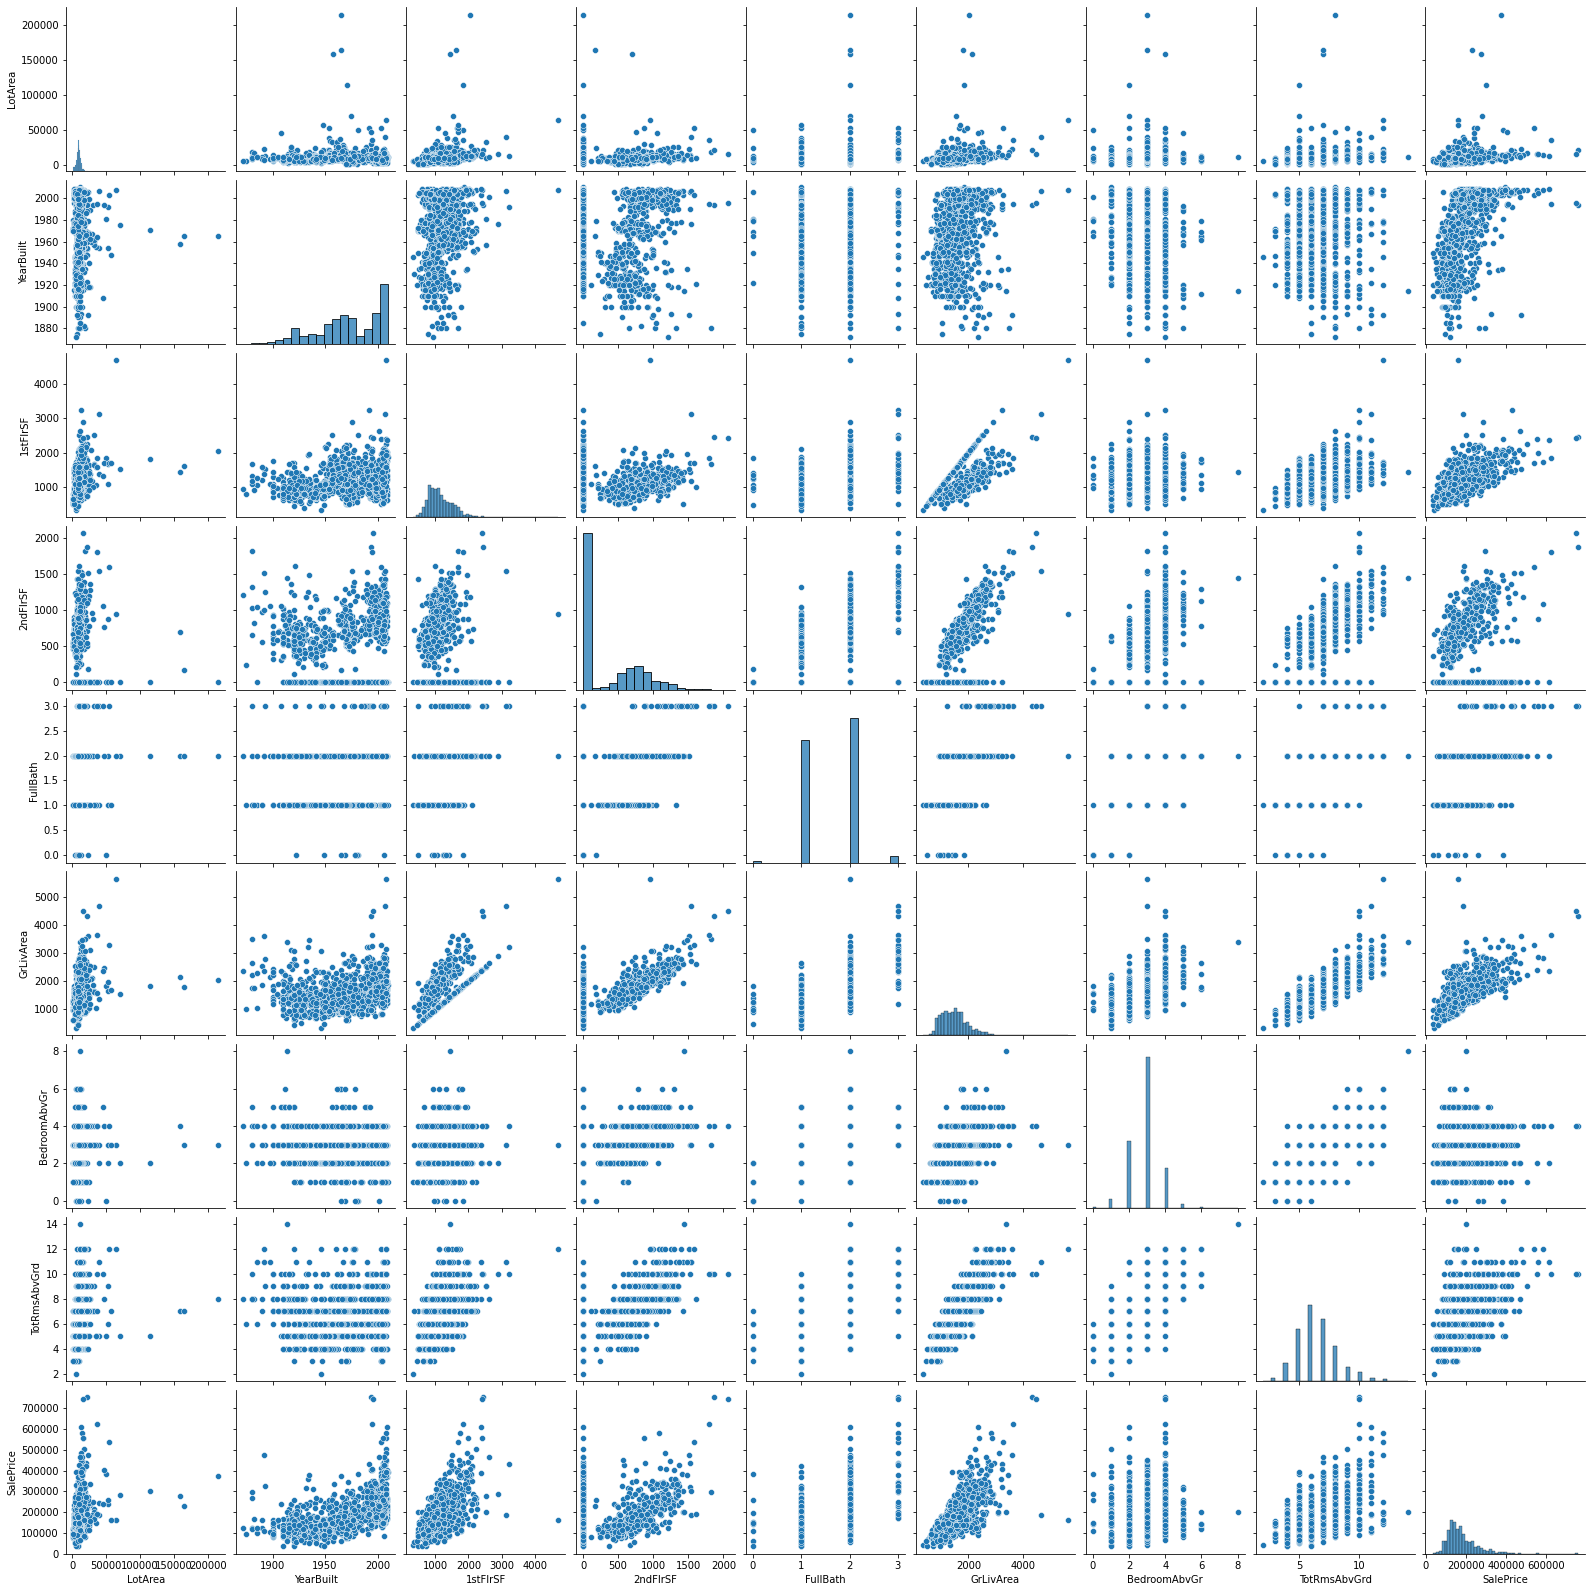

In [9]:
# Pair plot to Plot pairwise relationships in a dataset
plt.figure(figsize=(8, 6), dpi=100)
sns.pairplot(Iowadata, 
             x_vars=["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "GrLivArea", "BedroomAbvGr", "TotRmsAbvGrd", 'SalePrice'],
             y_vars=["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "GrLivArea", "BedroomAbvGr", "TotRmsAbvGrd", 'SalePrice'])
plt.show()

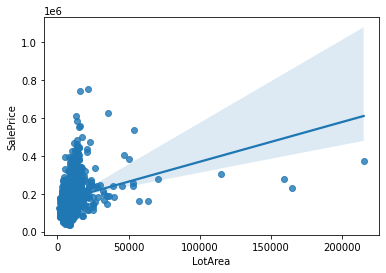

In [10]:
sns.regplot(data=Iowadata, x='LotArea', y='SalePrice' )

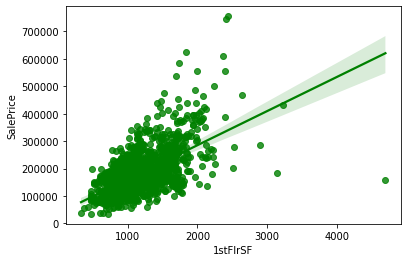

In [11]:
sns.regplot(data=Iowadata, x='1stFlrSF', y='SalePrice', color='green' )

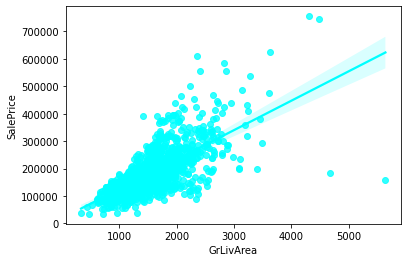

In [12]:
sns.regplot(data=Iowadata, x='GrLivArea', y='SalePrice', color='cyan' )

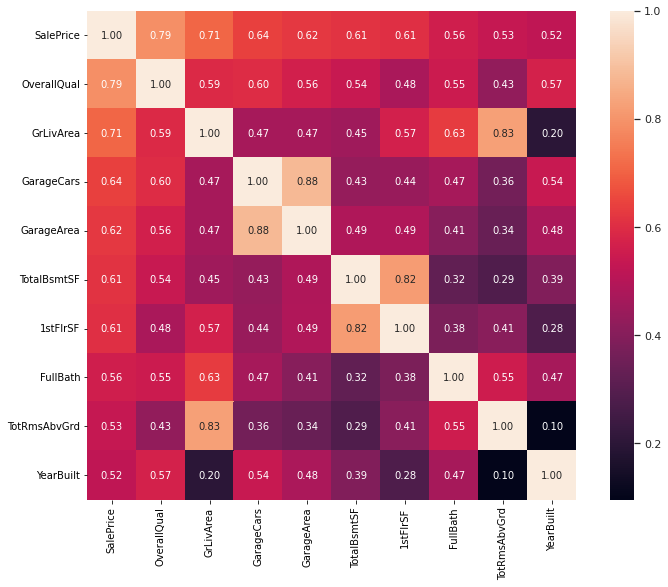

In [13]:
#saleprice correlation matrix

n = 10 
corrmat = Iowadata.corr()
f, ax = plt.subplots(figsize=(12, 9))
cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(Iowadata[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Decision Tree Regressor
Decision Tree are widely used in both in classification and regression problems. These are basically predictive models that use binary rules to calculate an output/target value. Each tree has branches, nodes and leaves where the root node represents the entire population or sample.

<div style="text-align:center"><img alt="Tree" src="https://github.com/thunderstroke325/60-Days-of-Data-Science-and-ML/blob/main/assets/tree.png?raw=true" /></div>

## Random Forest Regressor
It’s a supervised machine learning algorithm that is constructed from decision tree algorithms ( it predicts the outcome by taking the average or mean of the output from the different trees) and Is used to solve both regression and classification problems. It mainly used ensemble learning, a technique in which many classifiers are combined together to provide solutions to complex problems. It’s very efficient as it reduces the overfitting of datasets, provides an effective way of handling missing data, runs efficiently on large databases, achieves extremely high accuracies, increases precision and scales really well when new features are added to the dataset

<div style="text-align:center"><img alt="Random Forest" src="https://github.com/thunderstroke325/60-Days-of-Data-Science-and-ML/blob/main/assets/randomforest.png?raw=true" /></div>

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
predictor_cols = ['LotArea', 'OverallQual', 'GrLivArea','YearBuilt', 'TotRmsAbvGrd','TotalBsmtSF']

# Create training predictors data
train_X = Iowadata[predictor_cols]
train_y = Iowadata.SalePrice
Iowa_model_d=DecisionTreeRegressor(max_depth=2)
Iowa_model_d.fit(train_X,train_y)
Iowa_model_rr = RandomForestRegressor()
Iowa_model_rr.fit(train_X, train_y)

# Read the test data
test = pd.read_csv(test_data_path)
test_X = test[predictor_cols].head()

# Use the model to make predictions
predicted_prices_rr = Iowa_model_rr.predict(test_X)
predicted_prices_d = Iowa_model_d.predict(test_X)

print("Predicted prices ( Decision Tree Regressor):",np.round(predicted_prices_d))
print("Predicted Prices ( RandomForest Regressor):",predicted_prices_rr)

Predicted prices ( Decision Tree Regressor): [140384. 140384. 140384. 140384. 274736.]
Predicted Prices ( RandomForest Regressor): [131271.5  153150.9  170558.15 180631.   205064.12]
